## **Exercise: House Price Prediction with Linear Regression**

**Objective**: Build a linear regression model to predict house prices based on features like number of rooms, area, etc.

In [35]:
# 01. IMPORT LIBRARIES : Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [44]:
# 02. LOAD THE DATASET : Load the dataset from scikit-learn and create a DataFrame.

#Load dataset
housedata = fetch_california_housing()

#Create a DataFrame for better visualization
df = pd.DataFrame(housedata.data,columns=housedata.feature_names)
df['MedHouseVal'] = housedata.target

In [27]:
# 03. EXPLORE THE DATASET : Explore the dataset to understand its structure and distribution.

#Display first few rows of the dataset and basic statistics
print(df.head())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [50]:
# 04. PREPROCESS THE DATA: Split the data into training and testing sets, and scale the features.

#Separate the data
X = df.drop('MedHouseVal',axis=1)
Y = df['MedHouseVal']

#Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
# 05. TRAIN A LINEAR REGRESSION MODEL: Train a linear regression model on the data

#Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
#06. EVALUTE THE MODEL: Evaluate the model's performance on the test set.

#Predict on the test set
Y_pred = model.predict(X_test)

#Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


MSE: 5811.17
R-squared: -4426.42


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


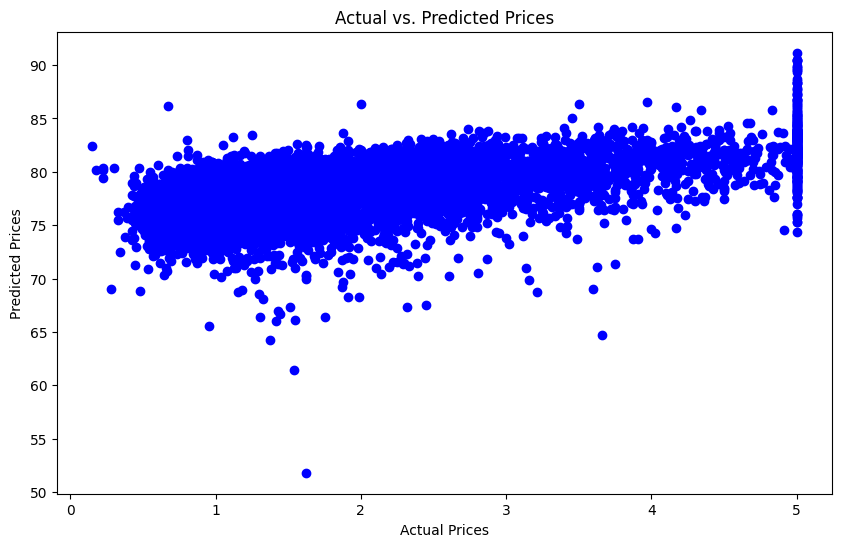

In [56]:
#07. VISUALIZE PREDICTIONS VS ACTUAL VALUES
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()